In [33]:
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk.util import ngrams, bigrams
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# import nltk
# nltk.download('wordnet')
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [3]:
#crude_article = reuters.raw(fileids=reuters.fileids(categories='crude')[2])
ids = reuters.fileids(categories='crude')
corpus = [reuters.raw(i) for i in ids]
big_string = ' '.join(corpus)

In [4]:
sw = set(stopwords.words('english'))
sw_addon = {'said', 'mln', 'kilolitres','kl', 'also', 'could','would'}
sw_union = sw.union(sw_addon)

In [5]:
 # define stopwording and regex 
def process_text(article, swu):
    #t_sentence = sent_tokenize(article)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    #for sent in t_sentence:
    t_word=word_tokenize(re_clean)
    first_pass= [word.lower() for word in t_word if word.lower() not in swu]
    txt_out = [lemmatizer.lemmatize(word, pos='a') for word in first_pass if len(word)>2]
    return txt_out

In [6]:
tokenized_article = process_text(big_string, sw_union)
tokenized_article[:10]

['japan',
 'revise',
 'longterm',
 'energy',
 'demand',
 'downwards',
 'ministry',
 'international',
 'trade',
 'industry']

In [7]:
from collections import Counter

In [8]:
word_counts = Counter(tokenized_article)
pd.DataFrame(list(word_counts.most_common(20)), columns=['token', 'count'])

,token,count
0,oil,2208
1,dlrs,751
2,crude,645
3,pct,583
4,prices,578
5,bpd,474
6,opec,467
7,barrels,403
8,year,395
9,production,385


In [77]:
bg_list = ngrams(process_text(big_string, sw_union), n=2)
bigram_counts = Counter(bg_list)

In [78]:
bigram_counts.most_common(10)

[(('crude', 'oil'), 340),
 (('oil', 'prices'), 203),
 (('dlrs', 'barrel'), 175),
 (('per', 'day'), 122),
 (('billion', 'dlrs'), 114),
 (('oil', 'gas'), 114),
 (('last', 'year'), 112),
 (('barrels', 'per'), 105),
 (('saudi', 'arabia'), 104),
 (('natural', 'gas'), 100)]

In [79]:
pd.DataFrame(list(bigram_counts.most_common(10)), columns=['bigram', 'count'])

,bigram,count
0,"(crude, oil)",340
1,"(oil, prices)",203
2,"(dlrs, barrel)",175
3,"(per, day)",122
4,"(billion, dlrs)",114
5,"(oil, gas)",114
6,"(last, year)",112
7,"(barrels, per)",105
8,"(saudi, arabia)",104
9,"(natural, gas)",100


In [15]:
input_text = ' '.join(process_text(big_string, sw_union))


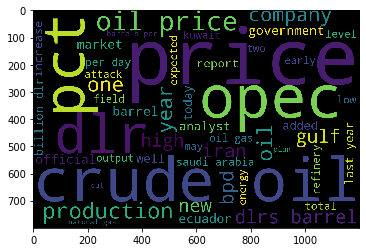

In [16]:
wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(wc)

In [71]:
bigrams_list = ngrams(tokenized_article, n=2)
bigram_counts = Counter(bigrams_lst)

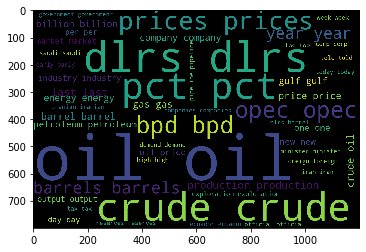

In [72]:
output = [' '.join(i) for i in bigrams_list]
bg_output = ' '.join(output)
wc = WordCloud(width=1200, height=800, max_words=50).generate(bg_output)
plt.imshow(wc)

In [80]:
bigram_counts.most_common(10)

[(('crude', 'oil'), 340),
 (('oil', 'prices'), 203),
 (('dlrs', 'barrel'), 175),
 (('per', 'day'), 122),
 (('billion', 'dlrs'), 114),
 (('oil', 'gas'), 114),
 (('last', 'year'), 112),
 (('barrels', 'per'), 105),
 (('saudi', 'arabia'), 104),
 (('natural', 'gas'), 100)]